<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>Text Mining</center>
# <center>Module 5 - Text Classification</center>
---

# 1. Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
df = pd.read_pickle('consumer_complaint_dataset.data', compression='gzip')
df.head()

,topic,input
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Credit reporting, credit repair services, or o...",I HAD FILED WITH CFPB ON XX/XX/XXXX19 TO HAVE ...
4,"Credit reporting, credit repair services, or o...",I have several accounts that the balance is in...


In [2]:
df.shape

(492255, 2)

In [3]:
df

,topic,input
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Credit reporting, credit repair services, or o...",I HAD FILED WITH CFPB ON XX/XX/XXXX19 TO HAVE ...
4,"Credit reporting, credit repair services, or o...",I have several accounts that the balance is in...
...,...,...
492250,Consumer Loan,I was on automatic payment for my car loan. In...
492251,Debt collection,I recieved a collections call from an unknown ...
492252,Mortgage,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who..."
492253,Mortgage,I can not get from chase who services my mortg...


In [4]:
pd.crosstab(df.topic, columns='Count')\
  .sort_values(by='Count', ascending=False)

col_0,Count
topic,
"Credit reporting, credit repair services, or other personal consumer reports",145090
Debt collection,106946
Mortgage,61581
Credit card or prepaid card,32144
Credit reporting,31588
Student loan,25083
Checking or savings account,19153
Credit card,18838
Bank account or service,14885


# 2. Label grouping / cleaning

- Group "Credit reporting" into "Credit reporting, credit repair services, or other personal consumer reports".
- Group "Credit card"/"Prepaid card" into "Credit card or prepaid card".
- Group "Payday loan" into "Payday loan, title loan, or personal loan".
- Group "Virtual currency"/"Money transfers" into "Money transfer, virtual currency, or money service".
- Remove "Other financial service"

In [5]:
df.loc[df['topic'] == 'Credit reporting', 'topic'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['topic'] == 'Credit card', 'topic'] = 'Credit card or prepaid card'
df.loc[df['topic'] == 'Prepaid card', 'topic'] = 'Credit card or prepaid card'
df.loc[df['topic'] == 'Payday loan', 'topic'] = 'Payday loan, title loan, or personal loan'
df.loc[df['topic'] == 'Virtual currency', 'topic'] = 'Money transfer, virtual currency, or money service'
df.loc[df['topic'] == 'Money transfers', 'topic'] = 'Money transfer, virtual currency, or money service'
df = df[df['topic'] != 'Other financial service']

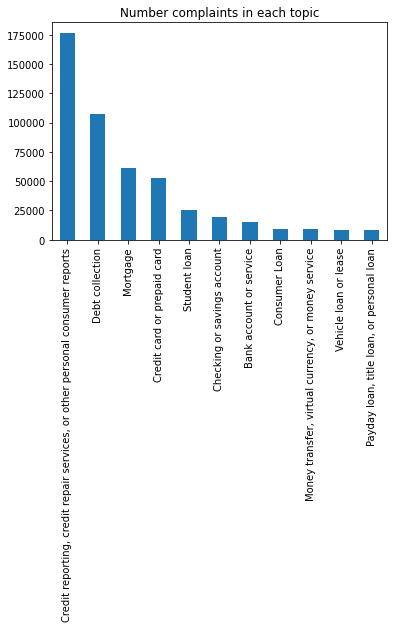

In [6]:
df['topic']\
  .value_counts()\
  .sort_values(ascending=False)\
  .plot(kind='bar',
        title='Number complaints in each topic')
plt.show()

In [7]:
def print_plot(index):
    example = df[df.index == index][['input', 'topic']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Topic:', example[1])
        
print_plot(10)

XXXX is reporting incorrectly to Equifax and XXXX an account balance of {$2300.00} on the XXXX partial account number XXXX. ( Please see pages 12 and 13 of the attached credit report ). This account is over 7 years old and therefore should not be on my credit report. This incorrect reporting is harming my credit score and is a Fair Credit Reporting Act ( F.C.R.A. ) violation.
Topic: Credit reporting, credit repair services, or other personal consumer reports


## Steps:
1. Convert all text to lower case.
2. Replace REPLACE_BY_SPACE_RE symbols by space in text.
3. Remove symbols that are in BAD_SYMBOLS_RE from text.
4. Remove “x” in text.
5. Remove stop words.
6. Remove digits in text.

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:

import re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

df['input'] = df['input'].apply(clean_text)

# Remove groups of numerical sequences with whitespace
df['input'] = df['input'].str.replace('\d+', '')

C:\Users\USER\AppData\Local\Temp/ipykernel_36784/1963230406.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['input'] = df['input'].apply(clean_text)
C:\Users\USER\AppData\Local\Temp/ipykernel_36784/1963230406.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['input'] = df['input'].str.replace('\d+', '')
C:\Users\USER\AppData\Local\Temp/ipykernel_36784/1963230406.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['input'] = df['input'].str.

In [11]:
# print cleaned text
print_plot(10)

reporting incorrectly equifa account balance  partial account number please see pages   attached credit report account  years old therefore credit report incorrect reporting harming credit score fair credit reporting act fcra violation
Topic: Credit reporting, credit repair services, or other personal consumer reports


In [12]:
# convert text(tokens) -> vector(term frequency)
# convert raw document -> TFIDF features

from sklearn.feature_extraction.text import TfidfVectorizer

# 20k col (features) * ~500k col (data)
vectorizer = TfidfVectorizer(max_features=20000)
tfidf_matrix = vectorizer.fit_transform(df['input'])

In [13]:
# TFIDF (importance of word ) 
# is Term frequency (number of word) * Inverse Document Frequency (Rarity of word amongst the entire document)

tfidf_matrix

<491963x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 28419397 stored elements in Compressed Sparse Row format>

In [14]:
import numpy as np
decoding = np.array(vectorizer.get_feature_names())

In [15]:
np.where(np.array(tfidf_matrix[10].todense())[0] != 0)

(array([  161,   288,  1329,  1604,  4156,  6390,  6687,  6800,  8069,
         8891,  8893, 11898, 12103, 12503, 12581, 13064, 14855, 14870,
        15738, 15865, 17800, 19270, 19921], dtype=int64),)

In [16]:
decoding[np.where(np.array(tfidf_matrix[10].todense())[0] != 0)]

array(['account', 'act', 'attached', 'balance', 'credit', 'equifa',
       'fair', 'fcra', 'harming', 'incorrect', 'incorrectly', 'number',
       'old', 'pages', 'partial', 'please', 'report', 'reporting',
       'score', 'see', 'therefore', 'violation', 'years'], dtype='<U69')

In [17]:
print_plot(10)

reporting incorrectly equifa account balance  partial account number please see pages   attached credit report account  years old therefore credit report incorrect reporting harming credit score fair credit reporting act fcra violation
Topic: Credit reporting, credit repair services, or other personal consumer reports


# 3. Feature selection

In [18]:
Y = pd.get_dummies(df['topic']).values

In [19]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
Y.shape

(491963, 11)

In [21]:
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(tfidf_matrix, df['topic'])

SelectPercentile()

In [22]:
# select only the features associated with Y (10% of 20k features))
X = selector.transform(tfidf_matrix).toarray()

In [23]:
X.shape

(491963, 2000)

In [24]:
# get the important words

decoding[selector.get_support()]

array(['aadvantage', 'able', 'abusive', ..., 'years', 'yelling', 'zelle'],
      dtype='<U69')

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(df['topic'])

In [26]:
Y

array([5, 4, 5, ..., 7, 7, 3])

# 4. Hold out sampling

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['topic'], test_size=0.3)

# 5. Naive Bayes

In [28]:
%%time
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

Wall time: 45.8 s


GaussianNB()

In [29]:
%%time
score_train = model.score(X_train, y_train)

Wall time: 4min 44s


In [30]:
%%time
score_test = model.score(X_test, y_test)

Wall time: 35.2 s


In [31]:
# overfit 

print("\nTrain set score:", score_train)
print("Test set score:", score_test)


Train set score: 0.38505229779251626
Test set score: 0.3804484074016356


# 6. SVM

In [32]:
from sklearn.svm import LinearSVC
model = LinearSVC(class_weight='balanced')
model.fit(X_train, y_train)

LinearSVC(class_weight='balanced')

In [33]:
res = model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=res, y_true=y_test))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.46      0.43      0.45      4543
                                                 Checking or savings account       0.55      0.66      0.60      5635
                                                               Consumer Loan       0.34      0.32      0.33      2921
                                                 Credit card or prepaid card       0.77      0.80      0.79     15808
Credit reporting, credit repair services, or other personal consumer reports       0.91      0.81      0.85     53049
                                                             Debt collection       0.82      0.80      0.81     31868
                          Money transfer, virtual currency, or money service       0.66      0.80      0.72      2862
                                                       

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred=res, y_true=y_test)

0.7923557988738998

# 7. Random Forest

In [36]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)

Wall time: 8min 52s


RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [37]:
res = model.predict(X_test)
print(classification_report(y_pred=res, y_true=y_test))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.63      0.30      0.40      4543
                                                 Checking or savings account       0.57      0.68      0.62      5635
                                                               Consumer Loan       0.54      0.15      0.24      2921
                                                 Credit card or prepaid card       0.77      0.80      0.78     15808
Credit reporting, credit repair services, or other personal consumer reports       0.86      0.92      0.89     53049
                                                             Debt collection       0.83      0.83      0.83     31868
                          Money transfer, virtual currency, or money service       0.80      0.69      0.74      2862
                                                       

---